In [1]:
#instal library
import sys
!{sys.executable} -m pip install bs4

In [2]:
#Source Code Web Scrape
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from datetime import date
import datetime
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api
import statsmodels.formula.api

today = date.today()
today=date.strftime(today,'%d/%m/%Y')
urlheader = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest"
}
filename=['D:\BTC_USD Bitfinex Historical Data.csv'] #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download
url = "https://www.investing.com/instruments/HistoricalDataAjax"


for each in filename:
    with open(each, 'r') as readFile:
        reader = csv.reader(readFile)
        lines = list(reader)
    startdate=lines[1][0]
    startdate=datetime.datetime.strptime(startdate,'%d-%b-%y')
    startdate += datetime.timedelta(days=1)
    startdate=startdate.strftime('%d/%m/%Y')
    readFile.close()
    if (each == 'D:\BTC_USD Bitfinex Historical Data.csv'): #Pastikan sesuai dengan tempat Directory penyimpanan file yang sudah kalian download 
        header="BTC/USD Bitfinex Historical Data"
        curr_id="945629"
        smlID= "145284"
        column_name='BTC Price'
 
    payload = {'header': header, 
               'st_date': startdate, 'end_date': today, 
               'sort_col': 'date', 'action': 'historical_data', 
               'smlID': smlID, 'sort_ord': 'DESC', 'interval_sec': 'Daily', 'curr_id': curr_id}

    req = requests.post(url, headers=urlheader, data=payload)
    soup = BeautifulSoup(req.content, "lxml")
    table = soup.find('table', id="curr_table")
    split_rows = table.find_all("tr")
    rows = table.findAll('tr')
    header_text = []
    headers = rows[0]
    
    
    for th in headers.findAll('th'):
        header_text.append(th.text)
        
    del header_text[2:]
    
    row_text_array = []
    for row in rows[1:]:
        row_text = []
        for row_element in row.findAll(['th', 'td']):
            row_text.append(row_element.text.replace('\n', '').strip())
        del row_text[2:]
        row_text_array.append(row_text)
    
    df = pd.read_csv(each)
    
    df1 = pd.DataFrame(row_text_array)
    
    df1.rename(columns={0:'Date',1:column_name}, inplace=True)
    df=df.append(df1,sort=False)
    df=df.dropna()
    df['Date']= pd.to_datetime(df['Date'])
    df = df.sort_values('Date',ascending=False)
    
    df['Date']= df['Date'].dt.strftime('%d-%b-%y')
    print(df.head(3))
    df.to_csv(each,index=False)

        Date     Price      Open      High       Low   Vol. Change %
0  12-Oct-21  55,967.0  57,468.0  57,633.0  54,000.0  5.94K   -2.61%
1  11-Oct-21  57,468.0  54,701.0  57,802.5  54,430.0  7.51K    5.06%
2  10-Oct-21  54,701.0  54,978.0  56,414.0  54,173.0  5.84K   -0.50%


In [3]:
#Mengetahui informasi data yang telah di-scrape
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,12-Oct-21,"55,967.0","57,468.0","57,633.0","54,000.0",5.94K,-2.61%
1,11-Oct-21,"57,468.0","54,701.0","57,802.5","54,430.0",7.51K,5.06%
2,10-Oct-21,"54,701.0","54,978.0","56,414.0","54,173.0",5.84K,-0.50%
3,09-Oct-21,"54,978.0","53,925.0","55,443.7","53,711.0",2.44K,1.95%


In [4]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,3537,3537,3537,3537,3537,3537,3537
unique,3537,3055,3044,3003,3019,1923,1323
top,02-Dec-12,5.1,5.1,5.1,5.1,-,0.00%
freq,1,26,26,26,26,660,135


In [5]:
df.shape

(3537, 7)

In [6]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3537 non-null   object
 1   Price     3537 non-null   object
 2   Open      3537 non-null   object
 3   High      3537 non-null   object
 4   Low       3537 non-null   object
 5   Vol.      3537 non-null   object
 6   Change %  3537 non-null   object
dtypes: object(7)
memory usage: 221.1+ KB


In [8]:
#Mining beberapa kolom yang dibutuhkan untuk analisa data sekaligus mengetahui informasi setelah dilakukan mining
df['Date'] = pd.to_datetime(df['Date'])
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)

In [9]:
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-10-12,55967.0,57468.0,57633.0,54000.0,5.94K,-2.61%
1,2021-10-11,57468.0,54701.0,57802.5,54430.0,7.51K,5.06%
2,2021-10-10,54701.0,54978.0,56414.0,54173.0,5.84K,-0.50%
3,2021-10-09,54978.0,53925.0,55443.7,53711.0,2.44K,1.95%


In [10]:
df.head(4)

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-10-12,55967.0,57468.0,57633.0,54000.0,5.94K,-2.61%
1,2021-10-11,57468.0,54701.0,57802.5,54430.0,7.51K,5.06%
2,2021-10-10,54701.0,54978.0,56414.0,54173.0,5.84K,-0.50%
3,2021-10-09,54978.0,53925.0,55443.7,53711.0,2.44K,1.95%


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3537 entries, 0 to 3536
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3537 non-null   datetime64[ns]
 1   Price     3537 non-null   float64       
 2   Open      3537 non-null   float64       
 3   High      3537 non-null   float64       
 4   Low       3537 non-null   float64       
 5   Vol.      3537 non-null   object        
 6   Change %  3537 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 221.1+ KB


In [12]:
df.describe()

,Price,Open,High,Low
count,3537.000000,3537.000000,3537.000000,3537.000000
mean,6882.461634,6867.310913,7060.137235,6665.764461
std,12350.527632,12323.964251,12664.826666,11971.606851
min,4.200000,4.200000,4.200000,4.200000
25%,273.300000,273.300000,279.600000,267.300000
50%,872.600000,871.400000,901.500000,833.700000
75%,8230.100000,8230.000000,8423.500000,8019.700000
max,63518.000000,63518.000000,64374.000000,62348.000000


In [13]:
#Olah Data
avgp = df.groupby('Date')['Price'].mean()

In [14]:
x = avgp.index
y = avgp.values

Text(0.5, 1.0, 'Pergerakan Harga Bitcoin')

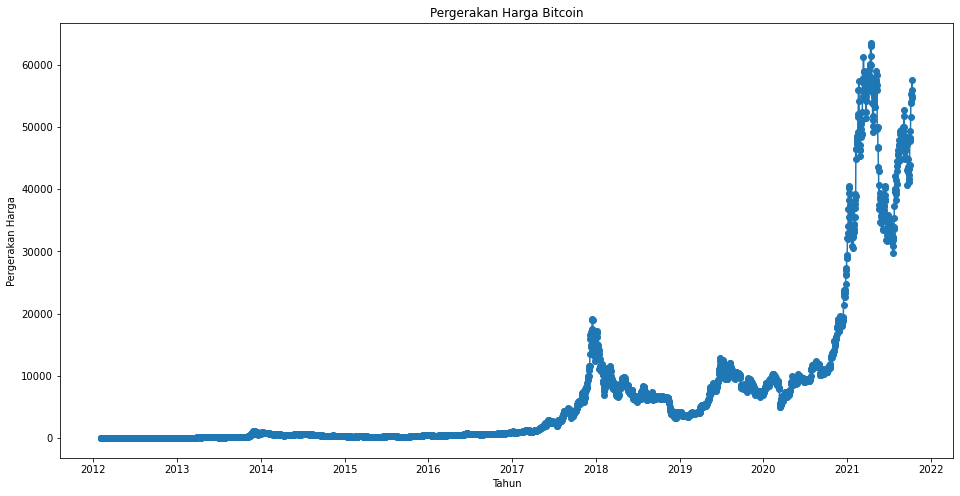

In [15]:
plt.figure(figsize=(16,8))
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Tahun')
plt.ylabel('Pergerakan Harga')
plt.title('Pergerakan Harga Bitcoin')

In [16]:
linreg = LinearRegression()
x=np.array(x).reshape(-1,1)
linreg.fit(x,y)

LinearRegression()

In [17]:
P_2021 = np.array(2021).reshape(-1,1)
pred_P = linreg.predict(P_2021)

In [19]:
print('Prediksi rata-rata harga tahun 2021 = ', pred_P.item())

Prediksi rata-rata harga tahun 2021 =  -134175.51652720835


In [20]:
regB = statsmodels.formula.api.ols('Price~High+Open', data = df).fit()
print(regB.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.907e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:11:08   Log-Likelihood:                -25989.
No. Observations:                3537   AIC:                         5.198e+04
Df Residuals:                    3534   BIC:                         5.200e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0074      7.236      0.139      0.8

In [21]:
regB1 = statsmodels.formula.api.ols('Price~High+Low', data = df).fit()
print(regB1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.702e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:16:51   Log-Likelihood:                -25373.
No. Observations:                3537   AIC:                         5.075e+04
Df Residuals:                    3534   BIC:                         5.077e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0150      6.080      0.331      0.7

In [22]:
regB2 = statsmodels.formula.api.ols('Price~Low+Open', data = df).fit()
print(regB2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.539e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:20:06   Log-Likelihood:                -26368.
No. Observations:                3537   AIC:                         5.274e+04
Df Residuals:                    3534   BIC:                         5.276e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6766      8.054      1.077      0.2

In [23]:
regB3 = statsmodels.formula.api.ols('Open~High+Price', data = df).fit()
print(regB3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.917e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:23:39   Log-Likelihood:                -25972.
No. Observations:                3537   AIC:                         5.195e+04
Df Residuals:                    3534   BIC:                         5.197e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7207      7.202      0.100      0.9

In [24]:
regB4 = statsmodels.formula.api.ols('Open~Low+Price', data = df).fit()
print(regB4.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.180e+06
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:24:50   Log-Likelihood:                -26830.
No. Observations:                3537   AIC:                         5.367e+04
Df Residuals:                    3534   BIC:                         5.368e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3176      9.176      1.015      0.3